*Each demo below includes a function definition followed by example code using it. The functions do not rely on any global variables. To use the functions, just copy/paste them (including the import statements at the top) into your own Python code or Jupyter notebook.*

# Fitting Data (scipy)

The scipy.optimize.curve_fit() function can fit nonlinear user-defined functions. 
Here, I use it for a linear fit.

slope     = 0.929 +/- 0.070
intercept = 0.579 +/- 0.436
sigma_y   = 0.638
R squared = 0.956


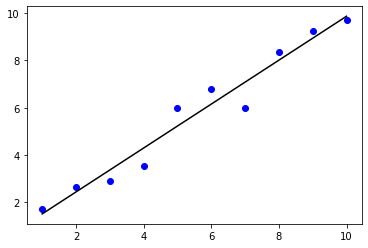

In [1]:
#======================================================================
# Fit a user-defined function f(x, <parameters>) to the data stored in 
# lists x (independent variable), y (dependent variable):
#
#   pars, errs = fit_data(x, y)
#
# pars: list of best-fit parameters
# errs: list of statistical uncertainties in the best-fit parameters
#======================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_data(x, y):

    # Define the fit function (linear here)
    def f(x, m, b): 
         return m*x + b

    # Store the coefficients of the best-fit line and the covariance matrix from the fit.
    pars, cov = curve_fit(f, x, y, p0=(0, 0))

    # Compute coefficient errors.
    errs = np.sqrt(np.diagonal(cov))

    # Compute the standard error for the y estimate
    # and the coefficient of determination.
    SSres = 0
    for i in range(len(x)):
        SSres += (y[i] - f(x[i], *pars))**2
    sigmay = np.sqrt(SSres/(len(x)-2))

    SStot = 0
    for i in range(len(x)):
        SStot += (y[i] - np.mean(y))**2
    R2 = 1 - SSres/SStot

    return pars, errs, sigmay, R2

# Generate some fake data
x = np.arange(1.,10.1, 1.)
y = x + 2.*(np.random.rand(len(x))-0.5)   # Fold in random scatter

pars, errs, sigmay, R2 = fit_data(x, y)

line = np.poly1d(pars)

plt.plot(x, y, 'bo', x, line(x), 'k-')

print('slope     = {0:.3f} +/- {1:.3f}'.format(pars[0], errs[0]))
print('intercept = {0:.3f} +/- {1:.3f}'.format(pars[1], errs[1]))
print('sigma_y   = {0:.3f}'.format(sigmay))
print('R squared = {0:.3f}'.format(R2))

# Fitting Data with Uncertainties in Y values (scipy)

slope     = 1.158 +/- 0.064
intercept = -1.225 +/- 0.466


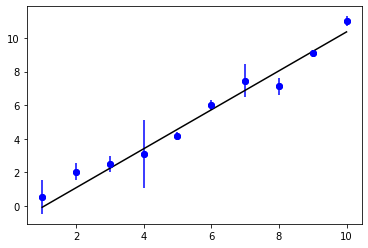

In [2]:
#======================================================================
# Fit a user-defined function f(x, <parameters>) to the data stored in 
# lists x (independent variable), y (dependent variable), and 
# dy (uncertainty in dependent variable):
#
#   pars, errs = fit_data_yerr(x, y, dy)
#
# pars: list of best-fit parameters
# errs: list of statistical uncertainties in the best-fit parameters
#
# The function has "nonlinear" in the name, because you can change
# f() to any function with any number of parameters.
#======================================================================
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fit_data_yerr(x, y, dy):

    # Define the fit function (linear here, but you can change this)
    def f(x, m, b): 
         return m*x + b
    
    # Store the coefficients of the best-fit line and the covariance matrix from the fit.
    pars, cov = curve_fit(f, x, y, p0=(0, 0), sigma=dy)

    # Compute coefficient errors
    errs = np.sqrt(np.diagonal(cov))

    return pars, errs

# Fake data with uncertainties in y values
x = np.arange(1., 10.1, 1.)
y = [0.53845859, 2.04661434, 2.50343206, 3.10308575, 4.19652852,  
     5.99638737, 7.46771528, 7.12116895, 9.07516995, 10.98666744]
dy = [ 1., 0.5, 0.5, 2.0, 0.2, 
      0.3, 1.0, 0.5, 0.2, 0.3]

pars, errs = fit_data_yerr(x, y, dy)

line = np.poly1d(pars)

plt.errorbar(x, y, yerr = dy, fmt='bo')
plt.plot(x, y, 'bo', x, line(x), 'k-')

print('slope     = {0:.3f} +/- {1:.3f}'.format(pars[0], errs[0]))
print('intercept = {0:.3f} +/- {1:.3f}'.format(pars[1], errs[1]))